# Simple modeling

### Loading data

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [32]:
#Convert the files to csv before loading data. The data given in the UCI datasets are not in the csv format
data_red = pd.read_csv('winequality-red.csv');
data_white = pd.read_csv('winequality-white.csv');

### Inspect data

In [4]:
data_red.describe()
#data_white.describe()
#As per the output from the above commands none of the columns have missing data.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualize

In [5]:
data_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
'''
f, axes = plt.subplots(4, 3, figsize=(20, 20))
sns.lineplot(x='fixed acidity', y='quality', data=data_red, ax=axes[0][0])
sns.lineplot(x='volatile acidity', y='quality', data=data_red, ax=axes[0][1])
sns.lineplot(x='citric acid', y='quality', data=data_red, ax=axes[0][2])
sns.lineplot(x='residual sugar', y='quality', data=data_red, ax=axes[1][0])
sns.lineplot(x='chlorides', y='quality', data=data_red, ax=axes[1][1])
sns.lineplot(x='free sulfur dioxide', y='quality', data=data_red, ax=axes[1][2])
sns.lineplot(x='fixed acidity', y='quality', data=data_red, ax=axes[2][0])
sns.lineplot(x='total sulfur dioxide', y='quality', data=data_red, ax=axes[2][1])
sns.lineplot(x='density', y='quality', data=data_red, ax=axes[2][2])
sns.lineplot(x='pH', y='quality', data=data_red, ax=axes[3][0])
sns.lineplot(x='sulphates', y='quality', data=data_red, ax=axes[3][1])
sns.lineplot(x='alcohol', y='quality', data=data_red, ax=axes[3][2])
'''

"\nf, axes = plt.subplots(4, 3, figsize=(20, 20))\nsns.lineplot(x='fixed acidity', y='quality', data=data_red, ax=axes[0][0])\nsns.lineplot(x='volatile acidity', y='quality', data=data_red, ax=axes[0][1])\nsns.lineplot(x='citric acid', y='quality', data=data_red, ax=axes[0][2])\nsns.lineplot(x='residual sugar', y='quality', data=data_red, ax=axes[1][0])\nsns.lineplot(x='chlorides', y='quality', data=data_red, ax=axes[1][1])\nsns.lineplot(x='free sulfur dioxide', y='quality', data=data_red, ax=axes[1][2])\nsns.lineplot(x='fixed acidity', y='quality', data=data_red, ax=axes[2][0])\nsns.lineplot(x='total sulfur dioxide', y='quality', data=data_red, ax=axes[2][1])\nsns.lineplot(x='density', y='quality', data=data_red, ax=axes[2][2])\nsns.lineplot(x='pH', y='quality', data=data_red, ax=axes[3][0])\nsns.lineplot(x='sulphates', y='quality', data=data_red, ax=axes[3][1])\nsns.lineplot(x='alcohol', y='quality', data=data_red, ax=axes[3][2])\n"

### Seperate data into X and y (result column)

In [33]:
X = data_red.iloc[:,:-1]
y = data_red.iloc[:,-1]

### Split data into train (70%) and test (30%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Lets apply a simple model first: LinearRegression

In [9]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)
print('mean_absolute_error: {:5.4f}'.format(mean_absolute_error(y_test, y_pred)))

mean_absolute_error: 0.5234


# Advanced modeling

### Heatmap Analysis: Drop columns with low correlation to output column

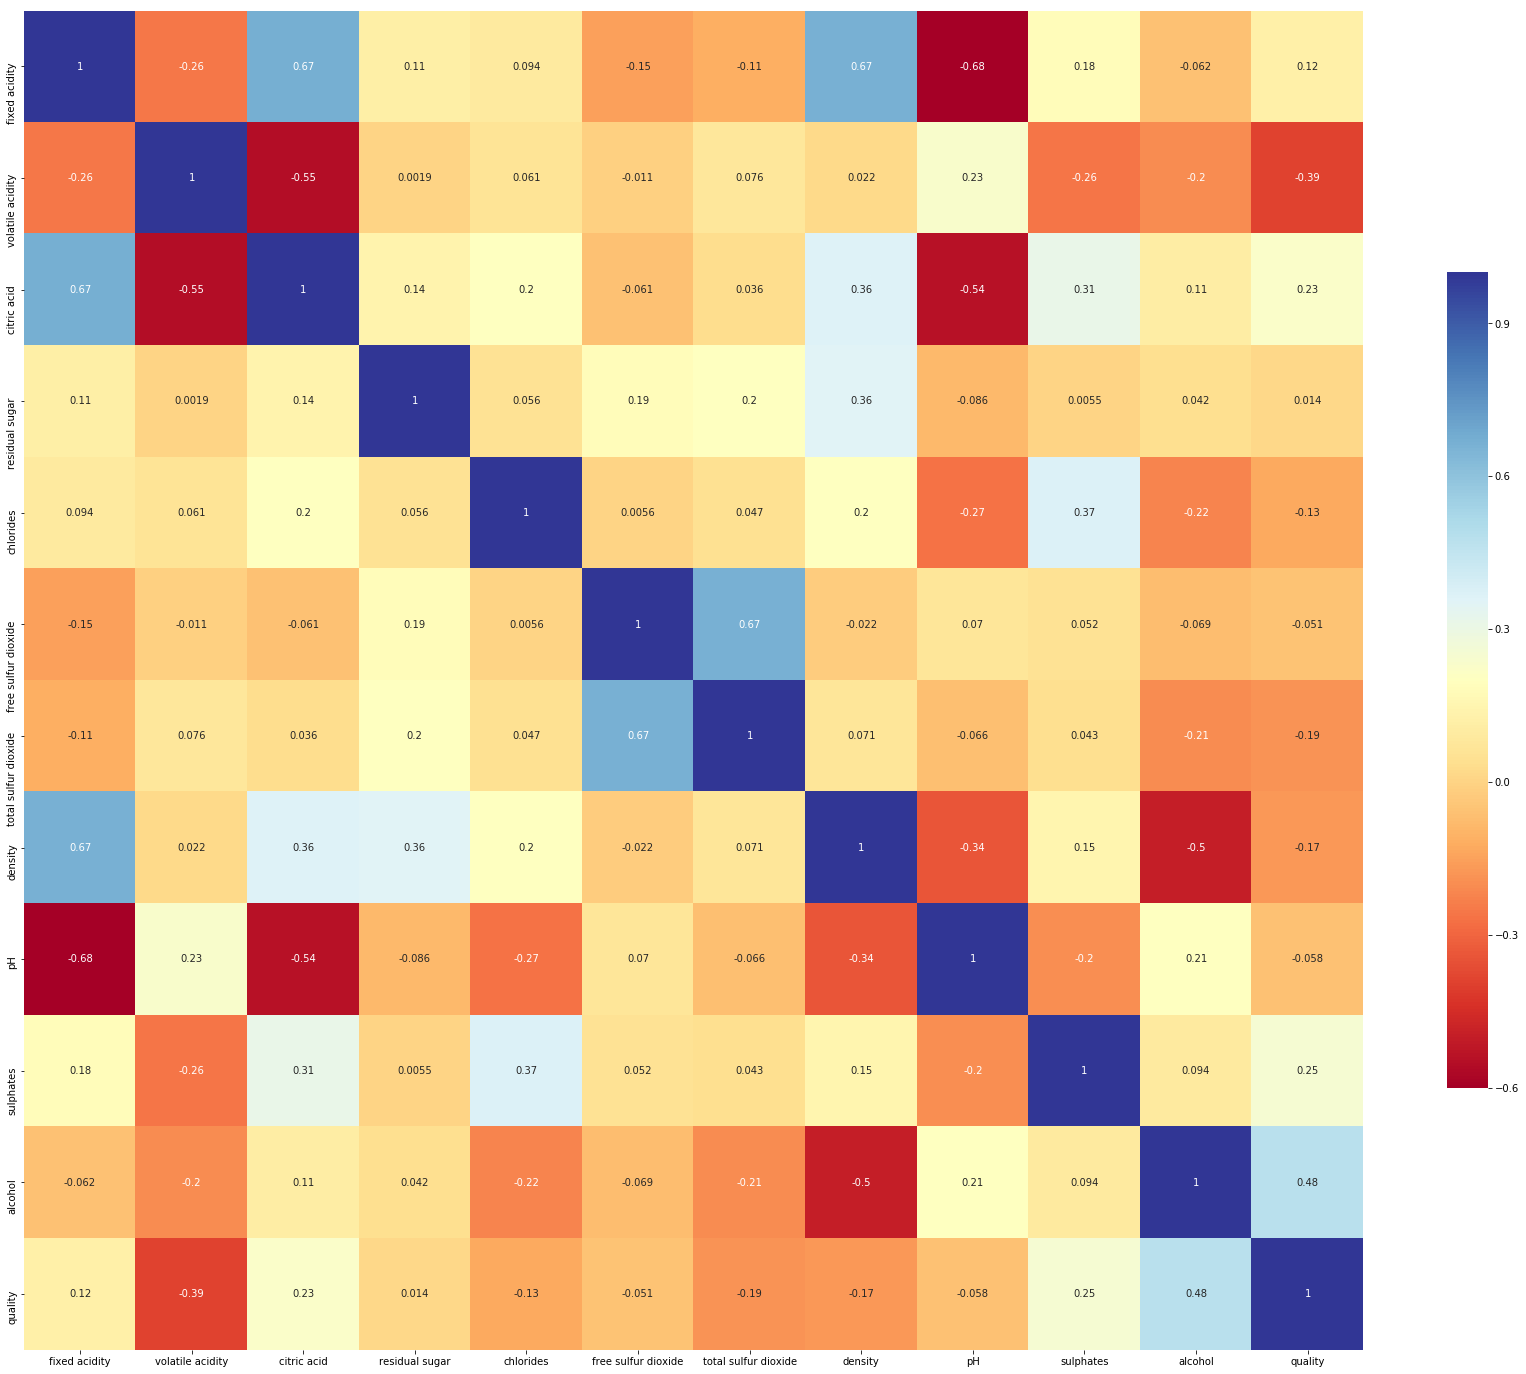

In [28]:
corr = data_red.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [34]:
def get_features(correlation_threshold):
    correlations = data_red.corr()['quality'].drop('quality')
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index
    return high_correlations

In [35]:
features = get_features(0.05) 
X = data_red[features] 
y = data_red['quality']
# In the above process, we dropped residual sugar column

In [30]:
X = data_red.iloc[:,:-1]
y = data_red.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)
print('mean_absolute_error: {:5.4f}'.format(mean_absolute_error(y_test, y_pred)))

mean_absolute_error: 0.5026


### Cross validation

In [50]:
linReg = LinearRegression()
my_pipeline = Pipeline(steps=[('model',linReg)])

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Avg score:\n", sum(scores)/5)

MAE scores:
 [0.52285641 0.52395387 0.5013778  0.50859932 0.49779402]
Avg score:
 0.510916283368142


### References

https://medium.com/datadriveninvestor/regression-from-scratch-wine-quality-prediction-d61195cb91c8